# AutoGluon Ensemble for California Housing Dataset

이 노트북은 **AutoGluon** 라이브러리를 사용하여 캘리포니아 주택 가격 데이터셋에 대한 회귀 모델을 자동으로 학습, 튜닝 및 앙상블(Voting, Stacking)하는 방법을 보여줍니다.

**다루는 모델 (AutoGluon이 자동 선택):**
- LightGBM (GBM)
- CatBoost
- XGBoost
- Random Forest (RF)
- Neural Networks (NN)
- Weighted Ensemble (Voting/Stacking 결과)

In [ ]:
from tqdm import tqdm
import time

# 0부터 99까지 반복하며 진행 바를 표시합니다.
for i in tqdm(range(100)):
    time.sleep(0.05)  # 작업을 시뮬레이션하기 위한 짧은 대기 시간

In [1]:
import sys
import sklearn
print("현재 파이썬 위치:", sys.executable)
print("Scikit-learn 버전:", sklearn.__version__)

현재 파이썬 위치: c:\Users\ailee\miniconda3\envs\ag\python.exe
Scikit-learn 버전: 1.7.2


In [ ]:
# AutoGluon 설치 (필요시 주석 해제 후 실행)
# !pip install autogluon

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metada

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [12]:
import sys
print(sys.executable)

c:\Users\ailee\miniconda3\envs\DS\python.exe


In [5]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

## 1. 데이터 로드 및 분할
Scikit-learn의 `fetch_california_housing` 데이터를 DataFrame으로 변환하고, 학습용(Train)과 테스트용(Test)으로 분리합니다.

In [3]:
# 데이터 로드
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# 학습/테스트 데이터 분리 (8:2)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
train_data.head()

Train Data Shape: (16512, 9)
Test Data Shape: (4128, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965


## 2. AutoGluon 학습 (앙상블 및 튜닝)
`presets='best_quality'`를 사용하여 최상의 성능을 목표로 학습합니다. 이 옵션은 내부적으로 **Bagging (배깅)**과 **Stacking (스태킹)**을 적용하여 성능을 극대화합니다.

- `label`: 예측할 타겟 컬럼명 ('MedHouseVal')
- `eval_metric`: 평가 지표 (여기서는 R2 score 사용, 기본 회귀 지표는 RMSE)
- `time_limit`: 학습 제한 시간 (초 단위, 예: 300초 = 5분). 충분한 시간을 주면 더 많은 모델을 튜닝합니다.

In [4]:
# AutoGluon Predictor 초기화 및 학습
predictor = TabularPredictor(label='MedHouseVal', eval_metric='r2', problem_type='regression').fit(
    train_data,
    presets='best_quality',  # 최적의 앙상블(Stacking/Bagging) 수행
    time_limit=600           # 10분 제한 (필요에 따라 늘리세요)
)

No path specified. Models will be saved in: "AutogluonModels\ag-20260128_073529"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.10.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          12
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       6.38 GB / 31.10 GB (20.5%)
Disk Space Avail:   251.08 GB / 930.84 GB (27.0%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	

(_ray_fit pid=32972) [1000]	valid_set's l2: 0.218697	valid_set's r2: 0.832706
(_ray_fit pid=33016) [3000]	valid_set's l2: 0.208928	valid_set's r2: 0.834884 [repeated 15x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=32788) [5000]	valid_set's l2: 0.206937	valid_set's r2: 0.851788 [repeated 8x across cluster]
(_ray_fit pid=32920) [8000]	valid_set's l2: 0.200854	valid_set's r2: 0.849931 [repeated 5x across cluster]


(_dystack pid=31372) 	0.8364	 = Validation score   (r2)
(_dystack pid=31372) 	25.57s	 = Training   runtime
(_dystack pid=31372) 	3.97s	 = Validation runtime
(_dystack pid=31372) Fitting model: LightGBM_BAG_L1 ... Training model for up to 56.70s of the 104.12s of remaining time.
(_dystack pid=31372) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.34%)


(_ray_fit pid=31256) [1000]	valid_set's l2: 0.222258	valid_set's r2: 0.825903 [repeated 2x across cluster]


(_dystack pid=31372) 	0.8487	 = Validation score   (r2)
(_dystack pid=31372) 	9.07s	 = Training   runtime
(_dystack pid=31372) 	2.06s	 = Validation runtime
(_dystack pid=31372) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 44.54s of the 91.96s of remaining time.
(_dystack pid=31372) 	Fitting 1 model on all data (use_child_oof=True) | Fitting with cpus=12, gpus=0, mem=0.1/9.2 GB
(_dystack pid=31372) 	0.8087	 = Validation score   (r2)
(_dystack pid=31372) 	5.22s	 = Training   runtime
(_dystack pid=31372) 	1.1s	 = Validation runtime
(_dystack pid=31372) Fitting model: CatBoost_BAG_L1 ... Training model for up to 37.59s of the 85.01s of remaining time.
(_dystack pid=31372) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=4.79%)


(_ray_fit pid=31304) [2000]	valid_set's l2: 0.179509	valid_set's r2: 0.865879 [repeated 8x across cluster]


(_ray_fit pid=33104) 	Ran out of time, early stopping on iteration 2483.
(_dystack pid=31372) 	0.8551	 = Validation score   (r2)
(_dystack pid=31372) 	31.32s	 = Training   runtime
(_dystack pid=31372) 	0.25s	 = Validation runtime
(_dystack pid=31372) Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 1.78s of the 49.20s of remaining time.
(_dystack pid=31372) 	Fitting 1 model on all data (use_child_oof=True) | Fitting with cpus=12, gpus=0, mem=0.1/4.2 GB
(_dystack pid=31372) 	0.8064	 = Validation score   (r2)
(_dystack pid=31372) 	1.64s	 = Training   runtime
(_dystack pid=31372) 	0.59s	 = Validation runtime
(_dystack pid=31372) Fitting model: WeightedEnsemble_L2 ... Training model for up to 142.44s of the 46.60s of remaining time.
(_dystack pid=31372) 	Fitting 1 model on all data | Fitting with cpus=12, gpus=0, mem=0.0/4.7 GB
(_dystack pid=31372) 	Ensemble Weights: {'CatBoost_BAG_L1': 0.692, 'LightGBM_BAG_L1': 0.308}
(_dystack pid=31372) 	0.8566	 = Validation score   (r2)

## 3. 결과 확인 (Leaderboard)
학습된 모든 모델(개별 모델 + 앙상블 모델)의 성능을 비교합니다.

In [6]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI_BAG_L2,0.868255,0.862370,r2,4.430627,6.925625,288.259348,0.312424,0.166545,19.476059,2,True,15
1,WeightedEnsemble_L3,0.867617,0.864074,r2,5.062645,7.698853,341.247261,0.002007,0.000000,0.167767,3,True,22
2,NeuralNetTorch_r79_BAG_L2,0.865139,0.861439,r2,4.305760,6.871116,312.555587,0.187557,0.112036,43.772298,2,True,20
3,LightGBMXT_BAG_L2,0.864039,0.857443,r2,4.183932,6.886684,270.880577,0.065728,0.127604,2.097288,2,True,10
4,LightGBM_BAG_L2,0.863942,0.858637,r2,4.144322,6.802392,270.640023,0.026119,0.043313,1.856734,2,True,11
5,CatBoost_BAG_L1,0.863887,0.858153,r2,0.271673,0.034536,199.429604,0.271673,0.034536,199.429604,1,True,4
6,CatBoost_r177_BAG_L2,0.863842,0.859668,r2,4.142875,6.774409,273.718859,0.024672,0.015330,4.935570,2,True,19
7,WeightedEnsemble_L2,0.863794,0.859843,r2,1.518438,2.799514,221.032034,0.002038,0.001004,0.064136,2,True,9
8,XGBoost_BAG_L2,0.863791,0.857704,r2,4.188963,6.790276,271.334013,0.070759,0.031197,2.550725,2,True,16
9,CatBoost_BAG_L2,0.863372,0.860033,r2,4.144001,6.773450,273.693464,0.025797,0.014371,4.910175,2,True,13


## 4. 테스트 데이터 평가
가장 성능이 좋은 모델(WeightedEnsemble)을 사용하여 테스트 데이터에 대한 최종 성능을 평가합니다.

In [7]:
results = predictor.evaluate(test_data)
print("Test R2 Score:", results['r2'])
print("Test RMSE:", -results['root_mean_squared_error']) # AutoGluon은 loss를 음수로 반환하므로 -를 붙여 확인

Test R2 Score: 0.8676170023033267
Test RMSE: 0.4165043442128365


## 5. 특성 중요도 (Feature Importance)
최적 모델이 예측에 어떤 특성을 가장 중요하게 사용했는지 확인합니다.

In [8]:
predictor.feature_importance(test_data)

Computing feature importance via permutation shuffling for 8 features using 4128 rows with 5 shuffle sets...
	197.09s	= Expected runtime (39.42s per shuffle set)
	77.6s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Latitude,1.639435,0.015189,8.840313e-10,5,1.670709,1.608161
Longitude,1.490879,0.016438,1.772928e-09,5,1.524724,1.457034
MedInc,0.229764,0.006336,6.931015e-08,5,0.242810,0.216719
AveRooms,0.138160,0.006164,4.741043e-07,5,0.150851,0.125468
AveOccup,0.125814,0.002442,1.702047e-08,5,0.130842,0.120786
HouseAge,0.038151,0.002976,4.409787e-06,5,0.044280,0.032023
AveBedrms,0.013696,0.002392,1.071781e-04,5,0.018621,0.008772
Population,0.007649,0.000457,1.523447e-06,5,0.008590,0.006708


Computing feature importance via permutation shuffling for 8 features using 4128 rows with 5 shuffle sets...
	159.9s	= Expected runtime (31.98s per shuffle set)
	72.29s	= Actual runtime (Completed 5 of 5 shuffle sets)
C:\Users\ailee\AppData\Local\Temp\ipykernel_28696\1762391839.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='importance', y=fi.index, data=fi, palette='viridis')


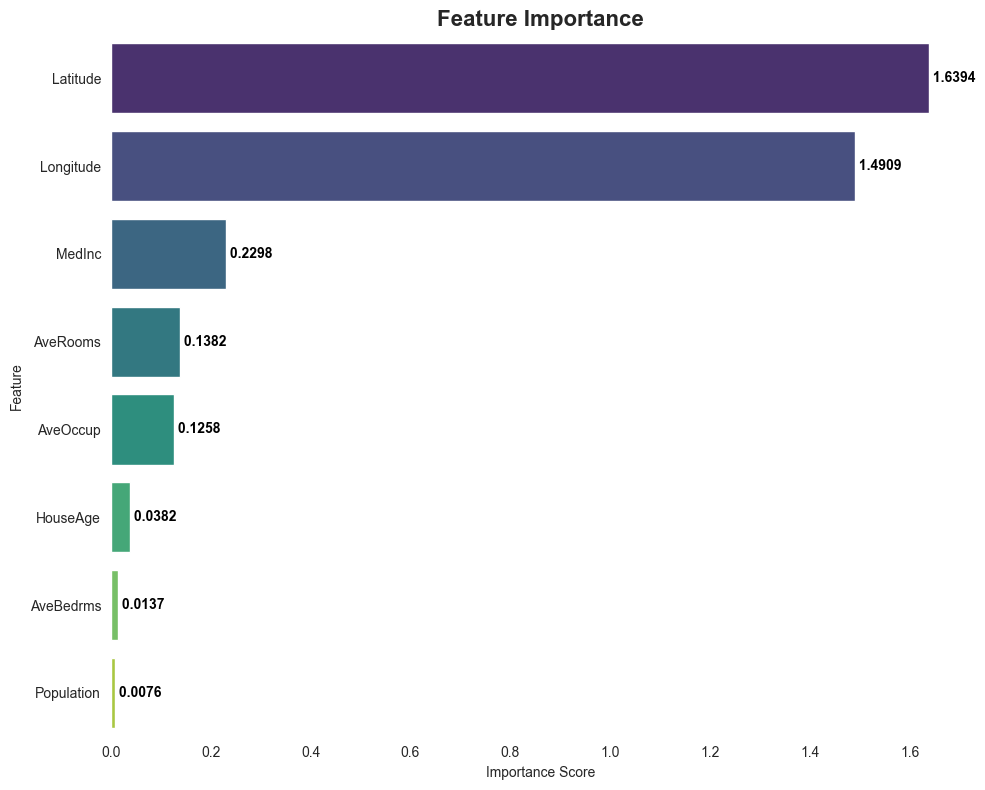

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 특성 중요도 데이터 계산
# (이미 계산된 fi 변수가 있다면 이 줄은 건너뛰셔도 됩니다)
fi = predictor.feature_importance(test_data)

# 2. 시각화 스타일 설정
plt.figure(figsize=(10, 8))
sns.set_style("white")

# 3. 막대 그래프 그리기 (중요도 순이므로 데이터프레임 순서 그대로 사용)
# x축: 중요도 점수, y축: 특성 이름
ax = sns.barplot(x='importance', y=fi.index, data=fi, palette='viridis')

# 4. 각 막대 옆에 수치(점수) 표시
for p in ax.patches:
    width = p.get_width()
    plt.text(width, 
             p.get_y() + p.get_height() / 2, 
             f' {width:.4f}',  # 소수점 4자리까지 표시
             va='center', 
             fontweight='bold',
             color='black')

# 5. 타이틀 및 레이블 설정
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# 6. 테두리 정리 (위쪽, 오른쪽 테두리 제거)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()